In [1]:
import sys
import os

import phys
phys.Measurement.set_code_scale("m", 0.001)
import phys.newton
import phys.light
import numpy as np
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

sim = phys.Simulation(bounds=np.array([1000, 1000, 1000]), cl_on=True, exit=lambda cond: len(cond.objects) == 0)


sim.add_objs(phys.light.generate_photons(1e5, bins=100, min=phys.light.E_from_wavelength(phys.Measurement(200e-9, "m**1")), max=phys.light.E_from_wavelength(phys.Measurement(700e-9, "m**1"))))
print("Done generating photons")
sim.add_step(0, phys.UpdateTimeStep(lambda s: phys.Measurement(0.00001, "s**1")))
sim.add_step(1, phys.newton.NewtonianKinematicsStep())
n = phys.Measurement(2.0e25, "m**-3")
A = phys.Measurement(5.1e-31, "m**2")
sim.add_step(2, phys.light.ScatterDeleteStep(n, A))
m1 = phys.light.ScatterMeasureStep(None, True, [phys.Measurement([1 / (n * A), np.nan, np.nan], "m**1"), phys.Measurement([9.80e4, np.nan, np.nan], "m**1")])
sim.add_step(3, m1)

sim.start()

while sim.running:
        time.sleep(5)
        print(sim.get_state())

{'s': [1, ('T', 1)], 'm': [0.001, ('L', 1)], 'kg': [1, ('M', 1)], 'A': [1, ('I', 1)], 'K': [1, ('Th', 1)], 'mol': [1, ('N', 1)], 'cd': [1, ('J', 1)]}
Done generating photons
{'objects': 97125, 't': 1e-05 s**1, 'dt': 1e-05 s**1, 'run_time': 5.01303243637085}
{'objects': 94732, 't': 2e-05 s**1, 'dt': 1e-05 s**1, 'run_time': 10.025087356567383}
{'objects': 92388, 't': 3.0000000000000004e-05 s**1, 'dt': 1e-05 s**1, 'run_time': 15.07483696937561}
{'objects': 90065, 't': 4e-05 s**1, 'dt': 1e-05 s**1, 'run_time': 20.13329243659973}
{'objects': 87709, 't': 5e-05 s**1, 'dt': 1e-05 s**1, 'run_time': 25.19192934036255}
{'objects': 85219, 't': 6e-05 s**1, 'dt': 1e-05 s**1, 'run_time': 30.21034026145935}
{'objects': 81985, 't': 7.000000000000001e-05 s**1, 'dt': 1e-05 s**1, 'run_time': 35.22327494621277}
{'objects': 78618, 't': 8e-05 s**1, 'dt': 1e-05 s**1, 'run_time': 40.2541127204895}
{'objects': 75607, 't': 9e-05 s**1, 'dt': 1e-05 s**1, 'run_time': 45.26623320579529}
{'objects': 73239, 't': 0.000

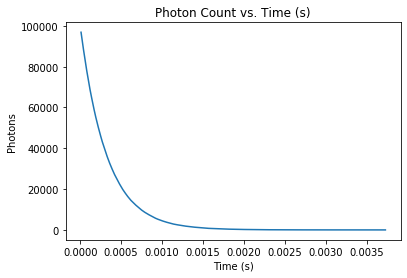

32 32
Photons at plane 1: 35880.0
Photons at plane 2: 35880.0
Expected: 36787.94411714424
Error: 0.024680479948894714


In [2]:
pos = 1 / (n * A)
pos2 = phys.Measurement(9.80e4, "m**1")

plt.plot(sim.ts, [x[1] for x in m1.data], label="n")
plt.ylabel("Photons")
plt.xlabel("Time (s)")
plt.title("Photon Count vs. Time (s)")
plt.show()
idx1 = int(((pos / sim.dt) / phys.light.c).__unscaled__())
idx2 = int((pos2 / sim.dt) / phys.light.c)
print(idx1, idx2)
print("Photons at plane 1: " + str(m1.data[idx1][2]))
print("Photons at plane 2: " + str(m1.data[idx2][2]))
expect = (1e5 / np.e)
print("Expected: " + str(expect))
print("Error: " + str((expect - m1.data[idx1][2]) / expect))